In [42]:
import pandas as pd

In [43]:
import seaborn as sns

In [44]:
import matplotlib.pyplot as plt

In [45]:
taxi=pd.read_csv('taxi_peru.csv',sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])

In [46]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [47]:
taxi.describe()

,start_at,end_at,arrived_at,driver_score,rider_score
count,23111,22835,17716,7650.000000,15390.000000
mean,2010-08-19 03:54:27.755614208,2010-08-19 08:17:38.987518976,2010-08-21 01:58:13.611424512,3.933333,4.755491
min,2010-01-01 00:25:00,2010-01-01 01:01:00,2010-01-01 00:39:00,0.000000,0.000000
25%,2010-06-07 15:40:00,2010-06-07 16:30:00,2010-06-10 23:21:00,4.000000,5.000000
50%,2010-09-09 13:37:00,2010-09-09 18:12:00,2010-09-12 13:26:30,5.000000,5.000000
75%,2010-11-07 19:10:00,2010-11-07 20:58:30,2010-11-10 00:49:15,5.000000,5.000000
max,2010-12-31 22:57:00,2010-12-31 22:58:00,2010-12-31 22:34:00,5.000000,5.000000
std,NaN,NaN,NaN,1.744948,0.840558


In [48]:
source_user=taxi.groupby('source',as_index=False).agg({'user_id':'count'})


In [49]:
source_user

,source,user_id
0,Android,4909
1,Wap,136
2,iPad,571
3,iPhone,9741
4,web,7631


In [9]:
sum_count=4909+136+571+9741+7631

In [10]:
source_procent=(9741/sum_count)*100

In [11]:
round(source_procent)

42

In [50]:
taxi_counts=taxi['source'].value_counts() \
               .reset_index() 
               
               

In [51]:
taxi_counts

,source,count
0,iPhone,9741
1,web,7631
2,Android,4909
3,iPad,571
4,Wap,136


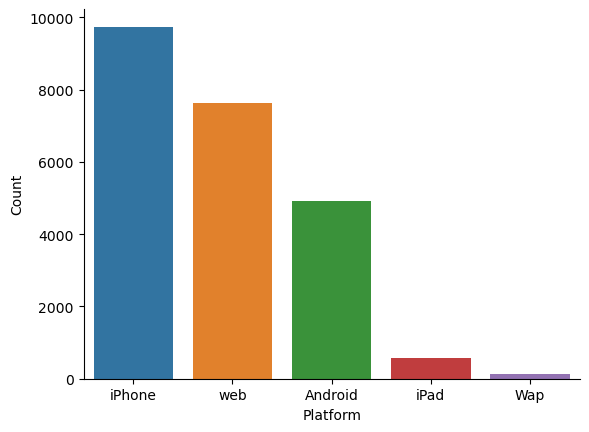

In [52]:
ax = sns.barplot(x='source', y='count', data=taxi_counts)
ax.set(xlabel='Platform', ylabel='Count') # подписываем оси 
sns.despine() # убрать часть рамки графика 
plt.show()

<Axes: xlabel='icon', ylabel='count'>

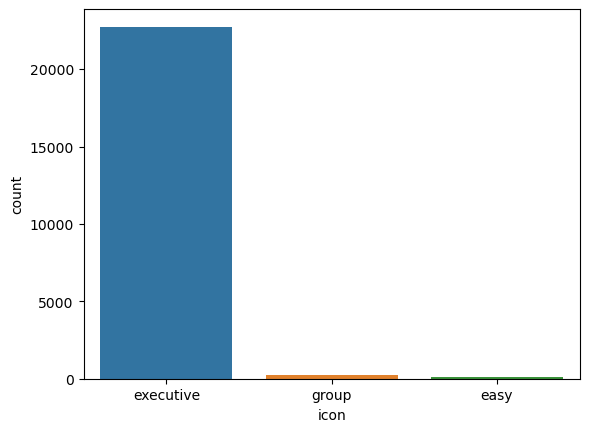

In [60]:
sns.countplot(x=taxi['icon'],data=taxi) 

<Axes: xlabel='source', ylabel='count'>

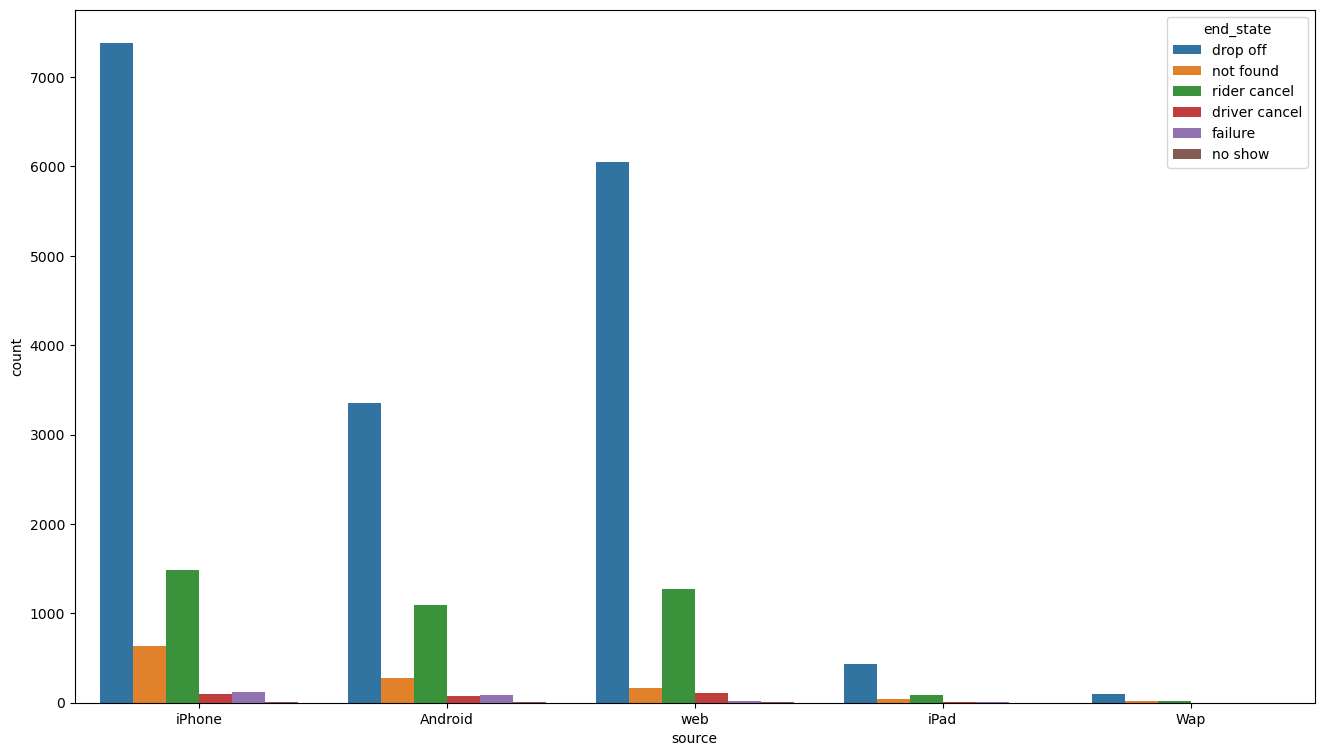

In [59]:
plt.figure(figsize=(16,9))
sns.countplot(x=taxi['source'],hue='end_state',data=taxi) 

In [84]:
driver_score_counts=taxi['driver_score']. \
value_counts(normalize=True). \
mul(100).round(2). \
reset_index().rename(columns={'proportion':'percentage'}). \
sort_values('driver_score')

In [82]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


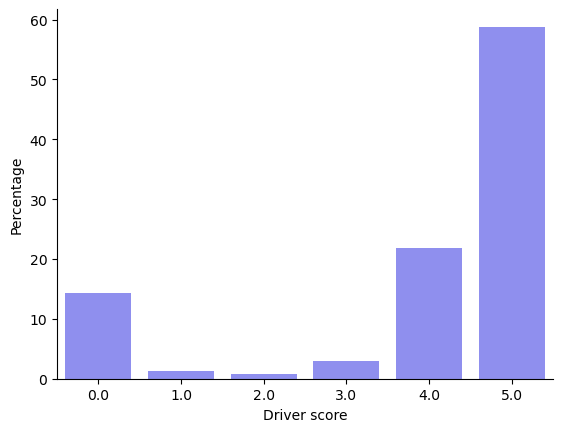

In [85]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [91]:
rider_score_counts=taxi['rider_score']. \
value_counts(normalize=True). \
mul(100).round(2). \
reset_index().rename(columns={'proportion':'percentage'}). \
sort_values('rider_score')

In [92]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


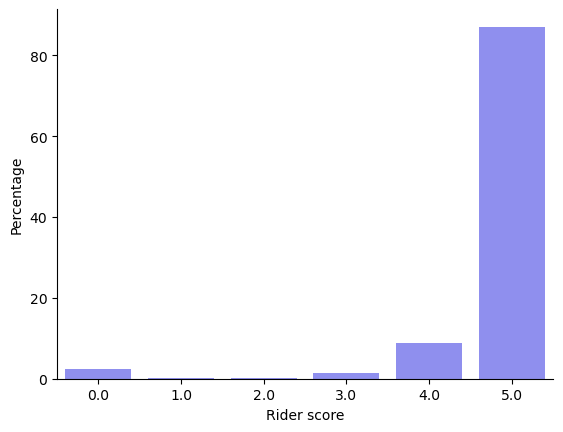

In [94]:
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()